In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #just in case, regularly update your lucem_illud with the following code: pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

# Exercise1

In [9]:
corpus_name = "/Users/motoku/Homework-Notebooks/week-2/News" 

In [4]:
def loadcorpus(corpus_name, corpus_style="text"):
    texts_raw = {}
    for file in os.listdir(corpus_name + "/"):
        if corpus_style in file:
            print(file)
            zfile = zipfile.ZipFile(corpus_name + "/" + file)
            for file in zfile.namelist():
                texts_raw[file] = []
                with zfile.open(file) as f:
                    for line in f:
                        texts_raw[file].append(line)
    #print(texts_raws)
    return texts_raw

In [11]:
news_raw = loadcorpus(corpus_name)
news_raw.keys() 

dict_keys(['w_news_1990.txt', 'w_news_1991.txt', 'w_news_1992.txt', 'w_news_1993.txt', 'w_news_1994.txt', 'w_news_1995.txt', 'w_news_1996.txt', 'w_news_1997.txt', 'w_news_1998.txt', 'w_news_1999.txt', 'w_news_2000.txt', 'w_news_2001.txt', 'w_news_2002.txt', 'w_news_2003.txt', 'w_news_2004.txt', 'w_news_2005.txt', 'w_news_2006.txt', 'w_news_2007.txt', 'w_news_2008.txt', 'w_news_2009.txt', 'w_news_2010.txt', 'w_news_2011.txt', 'w_news_2012.txt'])

In [17]:
len(news_raw['w_news_2002.txt']) #2291 news in 2002 , while the [0] is just b'\r\n' so we might need to delete it
news_raw['w_news_2002.txt'][1000] # notice that the first several number is always b'##3039286... we might need to get them out

b'##3039286 <p> Bearing lemon bars and chocolate-chip cookies , Rep. Nancy L. Johnson ( R-Conn. ) came to the municipal center here recently and urged voters to reelect a House member -- but not their current House member . <p> " I \'m very proud that I \'m one of the most senior members of Congress , " said Johnson , serving her 20th year in the House . " That gives Connecticut more power . " <p> In other words , she was saying , her incumbency is more valuable than that of Rep. James H. Maloney ( D-Conn. ) , who represents most of those attending the town hall meeting . <p> Johnson and Maloney belong to a small but unenviable congressional club that forms every 10 years : House members who face each other in reelection bids because of redistricting . While these intramural fights represent a fraction of the 435 House races , they are among the nation \'s most competitive and bitterly contested . <p> These races can not be waged with the typical House campaign strategy , in which one 

# 
there are news from 1990 to 2012, we select 2001 the year when 911 occurs as the bench mark year and analyze 1 year later, 2 years later and 5 years later whether there's greater concern for immigrants and what's the attitude towards them

In [108]:
def clean_raw_text(raw_texts):
    clean_texts = []
    for text in raw_texts:
        try:
            text = text.decode("utf-8")
            clean_text = text.replace(" \'m", "'m").replace(" \'ll", "'ll").replace(" \'re", "'re").replace(" \'s", "'s").replace(" \'re", "'re").replace(" n\'t", "n't").replace(" \'ve", "'ve").replace(" /'d", "'d")
            clean_texts.append(clean_text)
        except AttributeError:
            # print("ERROR CLEANING")
            # print(text)
            continue
        except UnicodeDecodeError:
            # print("Unicode Error, Skip")
            continue
    return clean_texts

def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)



In [109]:
clean_news_2000 = clean_raw_text(news_raw['w_news_2000.txt'][1:]) #total of 2193 news after doing the cleaning
clean_news_2001 = clean_raw_text(news_raw['w_news_2001.txt'][1:]) #total of 2117 news after doing the cleaning
clean_news_2002 = clean_raw_text(news_raw['w_news_2002.txt'][1:]) #total of 2290 news after doing the cleaning
#after cleaning, text became str rather than byte, helping us to deal with the words
clean_news_2003 = clean_raw_text(news_raw['w_news_2003.txt'][1:]) #total of 2251 news after doing the cleaning
clean_news_2004 = clean_raw_text(news_raw['w_news_2004.txt'][1:]) #total of 2251 news after doing the cleaning
print(len(clean_news_2000),len(clean_news_2001),len(clean_news_2002),len(clean_news_2003),len(clean_news_2004))

2193 2117 2290 2251 2251


In [110]:
clean_news2000_2004 = []
clean_news2000_2004.append(clean_news_2000)
clean_news2000_2004.append(clean_news_2001)
clean_news2000_2004.append(clean_news_2002)
clean_news2000_2004.append(clean_news_2003)
clean_news2000_2004.append(clean_news_2004)

In [111]:
len(clean_news2000_2004)

5

In [119]:
clean_news2000_2004[0][0]

'##3000655 <p> He became famous for his appearance -- the sideline stoicism , the courtly attire , self-restraint in the midst of a brutal sport and , of course , his hat . <p> But to his players , to his colleagues in National Football League and to the state of Texas , Tom Landry , the longtime Dallas Cowboys coach , represented much more . He was a father figure , a football innovator , even the gentlemanly and noble symbol who helped buoy Texans at a time when a state\'s identity seemed all too wrapped in the stigma of the assassination of President John F. Kennedy . <p> Landry was the coach of what came to be known as America\'s Team , and if he appeared more professor or bank president than football coach , then that set a standard , too . <p> " He conducted himself with such dignity and poise , it set the example for how you should live your life , " Charlie Waters , a Cowboys safety for 11 seasons , said of his former coach , who died @ @ @ @ @ @ @ @ @ @ <p> " People didn\'t un

In [128]:
clean_news2000_2004[0][0][9:-28] # real text start from number 9 after -28 it's the hyper link to nytime.com

' <p> He became famous for his appearance -- the sideline stoicism , the courtly attire , self-restraint in the midst of a brutal sport and , of course , his hat . <p> But to his players , to his colleagues in National Football League and to the state of Texas , Tom Landry , the longtime Dallas Cowboys coach , represented much more . He was a father figure , a football innovator , even the gentlemanly and noble symbol who helped buoy Texans at a time when a state\'s identity seemed all too wrapped in the stigma of the assassination of President John F. Kennedy . <p> Landry was the coach of what came to be known as America\'s Team , and if he appeared more professor or bank president than football coach , then that set a standard , too . <p> " He conducted himself with such dignity and poise , it set the example for how you should live your life , " Charlie Waters , a Cowboys safety for 11 seasons , said of his former coach , who died @ @ @ @ @ @ @ @ @ @ <p> " People didn\'t understand 

In [118]:
int(clean_news2000_2004[0][0].split('<p>')[0][2:].strip()) # or first split by <p> and take the first part

# real text start from number 9

3000655

In [129]:
def MakeFiles(target, maxFiles = 50):
    #maxFiles = 50
    #We are setting a max so our examples don't take too long to run
    #For converting to a DataFrame
    releasesDict = {
        'Year' : [],
        'name' : [], #The name of the file, number ID
        'text' : [], #The text of the file
        
    }

    for text in range(len(target[:maxFiles])):
        #These are provided by the directory
        if 'www.nytimes.com' in clean_news_2000[text]:
            releasesDict['Year'].append('2000') # change when necessary
            releasesDict['name'].append(int(clean_news_2000[text].split('<p>')[0][2:].strip())) # change when necessary
            
            releasesDict['text'].append(clean_news_2000[text][9:-28].replace('<p>','\n')) # change when necessary


        
    return pandas.DataFrame(releasesDict)
NT_News_2000=MakeFiles(clean_news_2000, len(clean_news_2000))
#NewsRelease['tokenized_text'] = NewsRelease['text'].apply(lambda x: word_tokenize(x))


In [130]:
NT_News_2000

,Year,name,text
0,2000,3000655,\n He became famous for his appearance -- the...
1,2000,3000658,"\n The task was finally too much , the magic ..."
2,2000,3000664,"\n Hypothetically , said Sandy Alderson , who..."
3,2000,3000665,\n Mike Piazza's last hit of 1999 was a two-r...
4,2000,3000666,"\n The sun was out , the fans were loud and J..."
...,...,...,...
233,2000,3006058,\n Akio Toyoda is Japan's Willliam Clay Ford ...
234,2000,3006059,"\n After years in the doldrums , biotechnolog..."
235,2000,3006061,\n This will be remembered as the year Micros...
236,2000,3006062,"\n De Beers , the global diamond giant , has ..."


In [131]:
NT_News_2000['text'][0]

' \n He became famous for his appearance -- the sideline stoicism , the courtly attire , self-restraint in the midst of a brutal sport and , of course , his hat . \n But to his players , to his colleagues in National Football League and to the state of Texas , Tom Landry , the longtime Dallas Cowboys coach , represented much more . He was a father figure , a football innovator , even the gentlemanly and noble symbol who helped buoy Texans at a time when a state\'s identity seemed all too wrapped in the stigma of the assassination of President John F. Kennedy . \n Landry was the coach of what came to be known as America\'s Team , and if he appeared more professor or bank president than football coach , then that set a standard , too . \n " He conducted himself with such dignity and poise , it set the example for how you should live your life , " Charlie Waters , a Cowboys safety for 11 seasons , said of his former coach , who died @ @ @ @ @ @ @ @ @ @ \n " People didn\'t understand the w

# Exercise 2

# Cleaning work
Now I have all the NYTimes news in the 2000 sample news with clean data and their corresponding number, next is to create such df from 2001 to 2004 and merge them together

In [149]:
def MakeNewsFiles(target, maxFiles = 50):
    #maxFiles = 50
    #We are setting a max so our examples don't take too long to run
    #For converting to a DataFrame
    releasesDict = {
        'Year' : [],
        'name' : [], #The name of the file, number ID
        'text' : [], #The text of the file
        
    }

    for text in range(len(target[:maxFiles])):
        #These are provided by the directory
        if 'www.nytimes.com' in target[text]:
            releasesDict['Year'].append('2004') # change when necessary， had to manually change it
            releasesDict['name'].append(int(target[text].split('<p>')[0][2:].strip())) # change when necessary
            
            releasesDict['text'].append(target[text][9:-28].replace('<p>','\n')) # change when necessary


        
    return pandas.DataFrame(releasesDict)


In [ ]:
NT_News_2002=MakeNewsFiles(clean_news_2002, len(clean_news_2002))

#NewsRelease['tokenized_text'] = NewsRelease['text'].apply(lambda x: word_tokenize(x))

In [148]:
NT_News_2003=MakeNewsFiles(clean_news_2003, len(clean_news_2003))

In [150]:
NT_News_2004=MakeNewsFiles(clean_news_2004, len(clean_news_2004))

In [152]:
NT_News_2004

,Year,name,text
0,2004,3000914,"\n Barry Bonds's personal trainer , a promine..."
1,2004,3000915,\n DerMarr Johnson had traveled across the co...
2,2004,3000916,\n While the National Hockey League was putti...
3,2004,3000918,"\n On Wednesday morning , with only five days..."
4,2004,3000919,"\n A year ago , a surprising and unusual alli..."
...,...,...,...
229,2004,3006240,"\n Google , the operator of the world's most ..."
230,2004,3006241,"\n Not long ago , garment makers in the world..."
231,2004,3006242,"\n In July 2003 , Samuel J. Palmisano , the c..."
232,2004,3006243,\n They sit on opposite sides of the Atlantic...


In [160]:
NT_News_2000_to_2004 = pandas.concat([NT_News_2000,NT_News_2001,NT_News_2002,NT_News_2003,NT_News_2004],axis=0,ignore_index=True)

In [206]:
NT_News_2000_to_2004['text'][1000]

' \n The signs of Brooklyn\'s building boom are scattered across the borough , and they are not hard to read . \n " Brand New Two-Family Homes -- Locations Include East New York , Bedford-Stuyvesant , " blares one sign on Pitkin Avenue . " Now Offering for Sale Luxury Two-Family Waterview Homes , Granite Kitchen , " says another , along the quiet East Mill Basin channel . " Another Job Done by S &S; Developers , " says a third , in south Williamsburg . \n These announcements , and the bricks and mortar they represent , are going up faster in Brooklyn than anywhere else in the city . According to census figures released last month , residential developers in New York City are building at the quickest pace in decades , and Brooklyn , perennial second fiddle to Manhattan , has become the new-housing capital of New York , with permits for more than 6,000 new housing units approved last year . \n More than 17,000 units of housing have been approved in Brooklyn since 2000 , and those now com

In [164]:
NT_News_2000_to_2004['tokenized_text'] = NT_News_2000_to_2004['text'].apply(lambda x: lucem_illud.word_tokenize(x))

In [168]:
# NT_News_2000_to_2004['tokenized_sents'] = NT_News_2000_to_2004['text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
# NT_News_2000_to_2004['normalized_sents'] = NT_News_2000_to_2004['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

In [170]:
NT_News_2000_to_2004['tokenized_sents'][0]

[['He',
  'became',
  'famous',
  'for',
  'his',
  'appearance',
  'the',
  'sideline',
  'stoicism',
  'the',
  'courtly',
  'attire',
  'self',
  'restraint',
  'in',
  'the',
  'midst',
  'of',
  'a',
  'brutal',
  'sport',
  'and',
  'of',
  'course',
  'his',
  'hat'],
 ['But',
  'to',
  'his',
  'players',
  'to',
  'his',
  'colleagues',
  'in',
  'National',
  'Football',
  'League',
  'and',
  'to',
  'the',
  'state',
  'of',
  'Texas',
  'Tom',
  'Landry',
  'the',
  'longtime',
  'Dallas',
  'Cowboys',
  'coach',
  'represented',
  'much',
  'more'],
 ['He',
  'was',
  'a',
  'father',
  'figure',
  'a',
  'football',
  'innovator',
  'even',
  'the',
  'gentlemanly',
  'and',
  'noble',
  'symbol',
  'who',
  'helped',
  'buoy',
  'Texans',
  'at',
  'a',
  'time',
  'when',
  'a',
  'state',
  "'s",
  'identity',
  'seemed',
  'all',
  'too',
  'wrapped',
  'in',
  'the',
  'stigma',
  'of',
  'the',
  'assassination',
  'of',
  'President',
  'John',
  'F.',
  'Kennedy'

In [173]:
import nltk

In [171]:
#NT_News_2000_to_2004['normalized_tokens'] = NT_News_2000_to_2004['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))


In [174]:
#.sum() adds together the lists from each row into a single list
NT_news_cfdist = nltk.ConditionalFreqDist(((len(w), w) for w in NT_News_2000_to_2004['normalized_tokens'].sum()))

#print the number of words
print(NT_news_cfdist.N())

1115813


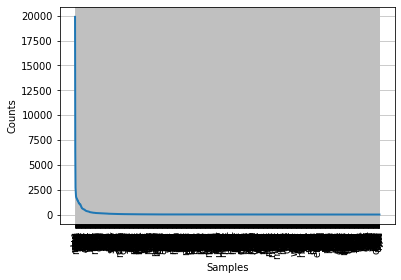

In [175]:
NT_news_cfdist[3].plot()

In [176]:
NT_news_cpdist = nltk.ConditionalProbDist(NT_news_cfdist, nltk.ELEProbDist)

#print the most common 2 letter word
print(NT_news_cpdist[2].max())

#And its probability
print(NT_news_cpdist[2].prob(NT_news_cpdist[2].max()))

mr
0.48833856458467867


In [192]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

def bigramScoring(count, wordsTuple, total):
    return count



In [178]:
#NT_News_2000_to_2004['normalized_tokens_POS'] = [spacy_pos(t) for t in NT_News_2000_to_2004['text']]

In [179]:
NT_news_cfdist_WordtoPOS = nltk.ConditionalFreqDist(NT_News_2000_to_2004['normalized_tokens_POS'].sum())
list(NT_news_cfdist_WordtoPOS.items())[:10]

[(' \n ', FreqDist({'_SP': 1193})),
 ('he', FreqDist({'PRP': 20329})),
 ('became', FreqDist({'VBD': 690})),
 ('famous', FreqDist({'JJ': 136})),
 ('for', FreqDist({'IN': 20950, 'CC': 1})),
 ('his', FreqDist({'PRP$': 12654, 'PRP': 13})),
 ('appearance', FreqDist({'NN': 84})),
 ('--', FreqDist({':': 7724, '.': 8})),
 ('the', FreqDist({'DT': 131635})),
 ('sideline', FreqDist({'NN': 18, 'VB': 1}))]

In [180]:
NT_news_cfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in NT_News_2000_to_2004['normalized_tokens_POS'].sum())

In [181]:
NT_news_cfdist_POStoWord['JJ']

FreqDist({'other': 3682, 'last': 3461, 'new': 3270, 'many': 3040, 'first': 2262, 'american': 2148, 'old': 1391, 'own': 1381, 'few': 1226, 'former': 1223, ...})

In [182]:
NT_news_cfdist_POStoWord['NN'].most_common(5)

[('year', 3352),
 ('time', 3167),
 ('company', 2707),
 ('percent', 2109),
 ('@', 2004)]

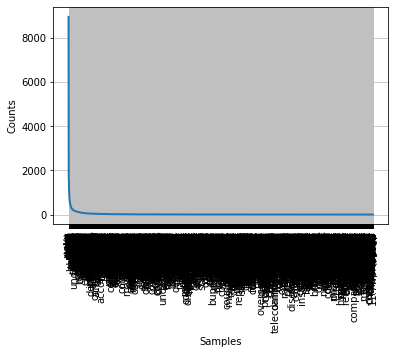

In [183]:
NT_news_cfdist_POStoWord['VB'].plot()

In [184]:
NT_news_cpdist_POStoWord = nltk.ConditionalProbDist(NT_news_cfdist_POStoWord, nltk.ELEProbDist)

#print the most common nouns
print(NT_news_cpdist_POStoWord['NN'].max())

#And its probability
print(NT_news_cpdist_POStoWord['NN'].prob(NT_news_cpdist_POStoWord['NN'].max()))

year
0.009296785849473875


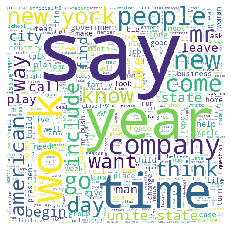

In [185]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(NT_News_2000_to_2004['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("NewYorkTimes_word_cloud.pdf", format = 'pdf')

# As we can see, mostly New York time is taoking about work, american way, and focusing taokings

In [187]:
NT_News_2000_to_2004['POS_sents'] = NT_News_2000_to_2004['tokenized_sents'].apply(lambda x: tag_sents_pos(x))

In [188]:
NT_News_2000_to_2004['POS_sents']

0       [[(He, PRP), (became, VBD), (famous, JJ), (for...
1       [[(The, DT), (task, NN), (was, VBD), (finally,...
2       [[(Hypothetically, RB), (said, VBD), (Sandy, N...
3       [[(Mike, NNP), (Piazza, NNP), ('s, POS), (last...
4       [[(The, DT), (sun, NN), (was, VBD), (out, IN),...
                              ...                        
1188    [[(Google, NNP), (the, DT), (operator, NN), (o...
1189    [[(Not, RB), (long, RB), (ago, JJ), (garment, ...
1190    [[(In, IN), (July, NNP), (2003, CD), (Samuel, ...
1191    [[(They, PRP), (sit, VBP), (on, IN), (opposite...
1192    [[(From, IN), (Puget, NNP), (Sound, NNP), (in,...
Name: POS_sents, Length: 1193, dtype: object

In [189]:
countTarget = 'NN'
targetCounts = {}
for entry in NT_News_2000_to_2004['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('year', 3316),
 ('time', 3058),
 ('company', 2535),
 ('percent', 2109),
 ('way', 1790),
 ('government', 1786),
 ('state', 1658),
 ('city', 1508),
 ('president', 1448),
 ('day', 1444),
 ('money', 1418),
 ('world', 1404),
 ('business', 1357),
 ('country', 1254),
 ('part', 1245),
 ('week', 1166),
 ('family', 1138),
 ('work', 1132),
 ('life', 1118),
 ('group', 1116)]

In [210]:
NTarget = 'JJ'
Word = 'china'
NResults = set()
for entry in NT_News_2000_to_2004['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)     

{'modern', 'native', 'central', 'senior', 'northern', 'much', 'courageous', 'southern', 'forthcoming', 'fine', 'profitable', 'sanguine', 'imperial', 'western', 'rural', 'ranking', 'total'}


In [193]:
NT_news_Bigrams = nltk.collocations.BigramCollocationFinder.from_words(NT_News_2000_to_2004['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(NT_news_Bigrams.N))

There are 1115813 bigrams in the finder


In [194]:
birgramScores = []
def bigramPrinting(count, wordsTuple, total):
    global birgramScores
    birgramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank

NT_news_Bigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[:10]))

The first word is:  136, The second word is: 144
The first word is:  144, The second word is: 37
The first word is:  37, The second word is: 2
The first word is:  2, The second word is: 3
The first word is:  3, The second word is: 9
The first word is:  9, The second word is: 293
The first word is:  293, The second word is: 26
The first word is:  26, The second word is: 38
The first word is:  38, The second word is: 38
The first word is:  38, The second word is: 594


In [198]:
[s for s in dir(bigram_measures) if s[0] != '_']

['chi_sq',
 'dice',
 'fisher',
 'jaccard',
 'likelihood_ratio',
 'mi_like',
 'phi_sq',
 'pmi',
 'poisson_stirling',
 'raw_freq',
 'student_t']

In [195]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
NT_news_Bigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[(('new', 'york'), 24704.694563913436),
 (('unite', 'state'), 16532.423679422354),
 (('mr', 'bush'), 5898.626114226447),
 (('year', 'ago'), 5873.036278934008),
 (('http', '//www.nytimes.com'), 5474.0164928072645),
 (('bin', 'lade'), 5180.7747253682455),
 (('vice', 'president'), 4938.145921876335),
 (('los', 'angeles'), 4579.967592797442),
 (('al', 'qaeda'), 4336.91359774869),
 (('chief', 'executive'), 4121.835523699413),
 (('e', 'mail'), 3557.9001259108045),
 (('wall', 'street'), 3208.109154644885),
 (('white', 'house'), 3095.9930873523263),
 (('real', 'estate'), 3064.858858731975),
 (('url', 'http'), 2770.1658490819495),
 (('new', 'jersey'), 2768.5882542310037),
 (('unite', 'nation'), 2716.206830474494),
 (('york', 'city'), 2597.7049419140385),
 (('trade', 'center'), 2547.233588180827),
 (('san', 'francisco'), 2492.395778389039),
 (('wal', 'mart'), 2403.1616252343706),
 (('high', 'school'), 2196.7763924067176),
 (('web', 'site'), 2138.42936091055),
 (('prime', 'minister'), 2053.613055

In [197]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
NT_news_Trigrams = nltk.collocations.TrigramCollocationFinder.from_words(NT_News_2000_to_2004['normalized_tokens'].sum())
NT_news_Trigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('new', 'york', 'city'), 19.49197541618511),
 (('new', 'york', 'time'), 16.519449482729698),
 (('url', 'http', '//www.nytimes.com'), 14.730915156124027),
 (('world', 'trade', 'center'), 14.491214579399013),
 (('mr', 'bin', 'lade'), 11.6188328770657),
 (('//www.nytimes.com', 'correction', 'date'), 11.489122991210031),
 (('http', '//www.nytimes.com', 'correction'), 11.313706563794957),
 (('e', 'mail', 'message'), 10.295627051897682),
 (('new', 'york', 'state'), 9.689901709634102),
 (('george', 'w.', 'bush'), 9.486811360976898),
 (('aol', 'time', 'warner'), 8.485266096508914),
 (('world', 'war', 'ii'), 8.36656104094836),
 (('osama', 'bin', 'lade'), 8.124037662565016),
 (('mr', 'bush', 'say'), 7.809560665447412),
 (('security', 'exchange', 'commission'), 7.615750424136717),
 (('law', 'enforcement', 'official'), 7.28002704640291),
 (('senior', 'vice', 'president'), 7.280019850304713),
 (('weapon', 'mass', 'destruction'), 7.211100535713491),
 (('george', 'e.', 'pataki'), 6.92819901057287),

In [211]:
def tag_sents_ner(sentences):
    """
    function which replicates NLTK ner tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for ent in sent.ents:
            pos_sent.append((ent.text, ent.label_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [212]:
#NT_News_2000_to_2004['classified_sents'] = NT_News_2000_to_2004['tokenized_sents'].apply(lambda x: tag_sents_ner(x))

In [213]:
entityCounts = {}
for entry in NT_News_2000_to_2004['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if ent in entityCounts:
                entityCounts[ent] += 1
            else:
                entityCounts[ent] = 1
sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:10]

[('one', 2805),
 ('American', 2223),
 ('two', 2131),
 ('first', 2130),
 ('Bush', 1668),
 ('New York', 1139),
 ('the United States', 1134),
 ('Iraq', 965),
 ('three', 914),
 ('today', 668)]

In [214]:
[x[0] for x in sortedEntities if x[1] == 2]

['11 seasons',
 'Wellington Mara',
 '29 years',
 'Mara',
 'George Young',
 'Roger Staubach',
 'Brandt',
 'Torrey Pines',
 'Maruyama',
 'Pebble Beach',
 'Sundays',
 '540,000',
 'eight feet',
 'three feet',
 'John Allen',
 'Junior',
 'Two years earlier',
 "the National League 's",
 'Triple Crown',
 'This winter',
 'Mike Hampton',
 '27 years old',
 'Orel Hershiser',
 'The St. Louis Cardinals',
 'Darryl Kile',
 '20-game',
 '11 12',
 'the start of the season',
 'Johnny Bench',
 'age 32',
 '.328',
 '85-year',
 'Todd Zeile',
 'the 2000 season',
 'Ramiro Mendoza',
 'Joe Girardi',
 'Tom Wilson',
 'El Duque',
 'David Cone',
 'Game 4',
 'Demetrius Hook Mitchell',
 'Antonio Davis',
 'West Oakland',
 'the Long Island Surf',
 'the United States Basketball League',
 'the Harlem Globetrotters',
 '4,500',
 'Jim Kelly',
 'Bruce Smith',
 'Thurman',
 'Pro Bowl',
 'Bucs',
 '$ 13 million',
 'Porcher',
 '$ 4.081 million',
 '$ 12.5 million',
 'Rockets',
 'N.B.A. city',
 'the N.B.A.',
 'Russ Granik',
 '430',
 

In [215]:
nonObjCounts = {}
for entry in NT_News_2000_to_2004['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                continue
            elif ent in nonObjCounts:
                nonObjCounts[ent] += 1
            else:
                nonObjCounts[ent] = 1
sortedNonObj = sorted(nonObjCounts.items(), key = lambda x: x[1], reverse = True)
sortedNonObj[:10]

[('one', 2805),
 ('American', 2209),
 ('two', 2131),
 ('first', 2130),
 ('Bush', 1668),
 ('New York', 1137),
 ('the United States', 1134),
 ('Iraq', 965),
 ('three', 914),
 ('today', 668)]

In [219]:
OrgCounts = {}
for entry in NT_News_2000_to_2004['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'GPE':
                print(ent)

Texas
Dallas
America
Landry
Landry
New York
Landry
Landry
Dallas
N.F.L.
Landry
Landry
Landry
Landry
Landry
Landry
Landry
Dallas
Landry
Landry
Landry
Landry
Dallas
America
Dallas
Landry
O.K.
San Diego
Pebble Beach
Maruyama
Cincinnati
Cincinnati
N.L.
Dallas
Martinez
N.L.
Kile
Toronto
Houston
Colorado
St. Louis
Colorado
Philadelphia Sele
Los Angeles
Chicago
Milwaukee
Detroit
Montreal
Anaheim
Cleveland
Atlanta
New York
New York
Tampa
Fla.
El Duque
Posada Posada
O.K.
Puerto Rico
Atlanta
Oakland
Oakland
Oakland
New York
Oakland
Jones
West Oakland
South Carolina State
Oakland
Hayward
San Francisco
Oakland
Oakland
West Oakland
Oakland
Miami
Oakland
Buffalo
Buffalo
Buffalo
Detroit
Miami
Jacksonville
San Diego
Norman
Washington
Detroit
Seattle
Dallas
Seahawks
Seattle
Houston
Houston
Houston
N.B.A. city
Houston
Houston
Las Vegas
Memphis
Louisville
San Diego
New Orleans
Dallas
Dallas
North Beach
San Francisco
Indiana
Los Angeles
Houston
Boston
New York O'Brien
Boston
F.B.I
Baltimore
Tennessee
Tenn

Oregon
California
California
United States
New York
Texas
Bakersfield
Oregon
Ponderosa
California
California
San Francisco
California
California
Tiger Creek
F.B.I
the United States
F.B.I
F.B.I
the United States
Los Alamos
Los Alamos
Taiwan
Los Alamos
Sandia
Los Alamos
Los Alamos
Sandia
Los Alamos
Los Alamos
Los Alamos
Los Alamos
Sandia
Los Alamos
the State of California
Russia
Los Alamos
Taiwan
Hong Kong
the United States
Los Alamos
Sandia
Los Alamos
Sandia
Hong Kong
Los Alamos
Taiwan
F.B.I
Alexandria Va.
the United States
Los Alamos
Los Alamos
Los Alamos
Los Alamos
Washington
Missouri
New Jersey
Texas
Illinois
Michigan
Missouri
Pennsylvania
Washington
Wisconsin
America
New York Clinton
Missouri
Wisconsin
Michigan
Michigan
Florida
Kendall
Miami
Miami Dade
the United States
Jamaica
Coconut Grove
Berkeley
New Mexico
Los Alamos
Los Alamos
Los Alamos
Los Alamos
Los Alamos
Manhattan
Los Alamos
Los Alamos
Los Alamos
Los Alamos
California
Los Alamos
Los Alamos
Los Alamos
Los Alamos
California

the United States
Iraq
Kuwait
America
Iraq
Iraq
Iraq
Iraq
Iraq
Iraq
the United States
Samawa
Iraq
Kuwait
Russia
Turkey
Italy
Iraq
Baghdad
Iraq
Iraq
Kuwait
Iraq
Iraq
Iraq
Iraq
the United States
Iraq
the United States
Falluja
Iraq
Iraq
Grozny
Moscow
Chechnya
Grozny
Moscow
Grozny
Moscow
Kargalinskaya
Grozny
Grozny
Horizons
Grozny
Chechnya
Moscow
Chechnya
Grozny
Grozny
Chechnya
Grozny
Kosovo
America
Kosovo
America
Kosovo
Kosovo
the United States
Kosovo
Kosovo
Kosovo
Kosovo
Belgrade
Germany
Kosovo
Kosovo
Kosovo
Germany
Kosovo
Kosovo
Pones
Kosovo
Kosovo
Pones
Pones
Kosovo
Serbia
Belgrade
Belgrade
Kosovo
Kosovo
Russia
the United States
Kosovo
Kosovo
Kosovo
Kosovo
Serbia
Kosovo
Yugoslavia
Washington
Serbia
Kosovo
Italy
Kosovo
America
Belgrade
Kosovo
Washington
Belgrade
Kosovo
Presevo Valley
Kosovo
Serbia
Serbia
Kosovo
Belgrade
Serbia
Kosovo
Kosovo
Kosovo
U.S.
U.S.
Kosovo
Kosovo
Belgrade
Kosovo
Bosnia
Kosovo
Belgrade
Afghanistan
Lahore
India
Afghanistan
Khost
Kabul
Afghanistan
Kabul
London
Pari

New York
Colorado
Williamsburg
Wilmington
New York
Hollywood
New York
Victoria
London
Williamsburg
Colonial Williamsburg
Minneapolis
America
San Francisco
Arkansas
Connecticut
Wedgwood
Hollywood
America
South Carolina
Tweedledum
the District of Columbia
Washington
San Francisco
Atlanta
the United States
Charlotte
the United States
Maryland
Florida
Texas
DeKalb County
Ga.
Atlanta
DeKalb County
Atlanta
United States
U.S.
Minneapolis
New York
New York
United States
Chicago
Japan
the United States
Hong Kong
South Korea
Washington
Japan
Anaheim
Calif.
Santa Clara
Denver
New York 's
Rochester
San Francisco
Palo Alto Calif.
Washington
United States
New York City
United States
Pittsburgh
San Francisco
Los Angeles
Upper West Side
Kansas City Mo.
Janus
Janus
Janus
Mountain View
Calif.
America
Fort Worth
Chicago
Des Moines
Leyda
San Jose
Calif.
Menlo Park
Philadelphia
Philadelphia
San Mateo
Calif Senior
U.S.
Fluor
Aliso
Indonesia
Boston
New York City
Washington
Rochester
Manhattan
New York
New Yo

Oakland
Calif.
Pennsylvania
Philadelphia
Philadelphia
Uganda
Philadelphia
Dickey
Princeton
Ghana
Philadelphia
Soutine
Merion
Paris
Tokyo
Merion
Detroit
Pennsylvania
Australia
London
the United States
Netherlands
Australia
Scotland
Greece
Brooklyn
London
Balenciaga
New York
Milan
Paris
London
Paris
marijuana
the East Village
Brooklyn
Brooklyn
Boston
New York
Paris
New York
New York
London
New York
France
Spain
Paris
Philadelphia
New York
South Bend
Kalamazoo
Mich.
Helsinki
Finland
New York
Prokofiev
New York
South Bend
Moscow
Georgia
the United States
Canada
South Bend
Tbilisi
Chicago
New York
Chicago
St. Petersburg
Edinburgh
New York
Paris
Tbilisi Some
South Bend
Naxos
Naxos
Naxos
Westfield
Rome
Liege
Belgium
the United States
New York
Paris
Rockland County
Hollywood
Hannibal
Grand Guignol
Hannibal
F.B.I
Hannibal
Charade
Paris
Francophone
Philadelphia
Long Island
Florida
New York
Miami
San Francisco
Charlie
Brooklyn
Washington
London
London
Manhattan
Los Angeles
Burbank
Manhattan
New Y

Iraq
Iraq
the United States
Iraq
Baghdad
Iraq
Iraq
Baghdad
Baghdad
Iraq
Iran
Iraq
Baghdad
Iraq
Iraq
China
Manhattan
China
Taiwan
New York City
Washington
Taiwan
the United States
China
Washington
Taiwan
Washington
Beijing
China
China
China
Taiwan
China
China
the United States
Japan
Washington
China
Georgia
China
Taiwan
Taiwan
New York
China
Shanghai
China
China
Sun Yat
China
Taiwan
the People 's Republic
China
China
America
the United States
China
Washington
New York
Manhattan
the United States
North Carolina
China
Shanghai
China
China
Japan
America
Shanghai
Boston
Shanghai
China
China
the Soviet Union
Beijing
China
Moscow
Shanghai
the United States
Shanghai
China
China
Washington
China
China
China
Washington
Washington
China
China
New York
China
Taiwan
Taiwan
Beijing
New York
Taiwan
New York
Manhattan
Queens
Taiwan
China
China
China
China
Paris
China
China
China
the United States
China
China
Russia
India
China
the United States
India
Beijing
Beijing
China
China
Australia
China
Austral

Boston
Cleveland
Los Angeles
Denver
Milwaukee
N.B.A.
Portland
Indiana
Philadelphia
Philadelphia
Philadelphia
Philadelphia
Minnesota
Minnesota
Minnesota
Minnesota
Massachusetts
the Soviet Union
the United States
Canada
the United States
Russia
Canada
Montreal
Japan
Canada
Salt Lake City
San Jose Wilson
the United States
the United States
Italy
Phoenix
the United States
Finland
Canada
the United States
Canada
Toronto
Minnesota
Ohio
the United States District Court
Manhattan
Manhattan
San Jose
N.C.A.A.
San Francisco
N.B.A.
Miami
America
N.F.L.
Ethiopia
Ethiopia
Kenya
New York City
Boston
Ethiopia
Athens
Ethiopia
Ethiopia
the United States
Ethiopia
Sydney Australia
Addis Ababa
Addis Ababa
Ethiopia
Addis Ababa
Addis Ababa
Ethiopia
Ethiopia
Ethiopia
Rome
Mexico City Gebrselassie
Sydney
Paris
Ethiopia
Bekoji
Athens
Bekoji Fatuma Roba
Atlanta
Barcelona
Ethiopia
Kenya
Eritrea
Ethiopia
Addis Ababa
Addis Ababa
Bekoji
Addis Ababa
Dibaba
Paris
Dibaba
Olympic
Ethiopia
Athens
Ethiopia
Rome
Ethiopia
I

the United States
Iraq
America
Iraq
Iraq
Iraq
Iraq
Iraq
Iraq
America
Iraq
Transcript Page A12
Iraq
Iraq
United States
Iraq
Iraq
Iraq
the United States
Iraq
United States
Iraq
United States
Iraq
Iraq
the United States
Iraq
Iraq
Iraq
Iraq
San Diego
Iraq
Iraq
Iraq
Iraq
Iraq
Iraq
States
Iraq
Iraq
the United States
Iraq
the United States
Iraq
Iraq
Iraq
Iraq
Falluja Terrorists
Iraq
Iraq
Iraq
Iraq
America
Iraq
Iraq
America
America
America
Japan
Germany
America
Iraq
Iraq
Iraq
Iraq
Iraq
The United States
Iraq
Iraq
Iraq
Iraq
Iraq
Iraq
Iraq
Iraq
Iraq
Iraq
America
Kuwait
Afghanistan
Iraq
Iraq
Iraq
Baghdad
Madrid
Jerusalem
Bali
Beirut
America
Pakistan
Baghdad
Libya
Iraq
America
Iraq
America
Iraq
America
Iraq
Baghdad
Iraq
Vietnam
Vietnam
Iraq
America
Iraq
America
U.S.
Iraq
Iraq
Iraq
Iraq
U.S.
Iraq
Iraq
the United States
Iraq
Iraq
Iraq
W.M.D.
Iraq
Iraq
Iraq
America
U.S.
United States
America
America
F.B.I
America
F.B.I
F.B.I
America
F.B.I
Iraq
U.S.
Iraq
Iraq
America
Iraq
Iraq
North Korea
North Korea


In [220]:
from spacy import displacy

In [222]:
movie_violences = {}

In [223]:
for index, row in NT_News_2000_to_2004.iterrows():
    text = ' '.join(row['tokenized_text'])
    movie_violences[row['name']] = ([], [])
    doc = nlp(text)
    for chunk in doc.noun_chunks:
        subject = 0
        object_ = 0
        # if the verb or the root of the sentence is kill
        if chunk.root.head.text == 'kill':
            # we find the subjects and objects around the word, and if it does exist, add it to the tuple
            if chunk.root.dep_ == 'nsubj':
                subject = chunk.root.text
            if chunk.root.dep_ == 'dobj':
                object_ = chunk.root.text
            if subject is not 0:
                movie_violences[row['name']][0].append(subject)
            if object_ is not 0:
                movie_violences[row['name']][1].append(object_)

In [224]:
movie_violences

{3000655: ([], []),
 3000658: ([], []),
 3000664: ([], []),
 3000665: ([], []),
 3000666: ([], []),
 3000667: ([], []),
 3000668: ([], []),
 3000670: ([], []),
 3000671: ([], []),
 3000672: ([], []),
 3000674: ([], []),
 3000675: ([], []),
 3000678: ([], []),
 3000680: ([], []),
 3000681: ([], []),
 3000683: ([], []),
 3000684: ([], []),
 3000685: ([], []),
 3000688: ([], []),
 3000689: ([], []),
 3000690: ([], []),
 3000695: ([], []),
 3000697: ([], []),
 3000698: ([], []),
 3000700: ([], []),
 3000704: ([], []),
 3000707: ([], []),
 3000709: ([], []),
 3000712: ([], []),
 3000715: ([], []),
 3001545: ([], ['Diallo', 'alternative']),
 3001546: ([], []),
 3001547: ([], []),
 3001548: ([], []),
 3001549: ([], []),
 3001550: ([], ['somebody']),
 3001551: ([], []),
 3001552: ([], []),
 3001553: ([], ['you']),
 3001555: ([], []),
 3001556: ([], []),
 3001557: ([], []),
 3001558: ([], []),
 3001559: ([], []),
 3001560: ([], []),
 3001562: ([], []),
 3001563: ([], []),
 3001565: ([], []),
 3

In [225]:
NT_News_2000_to_2004.loc[NT_News_2000_to_2004['name']== 3003594]

,Year,name,text,tokenized_text,tokenized_sents,normalized_sents,normalized_tokens,normalized_tokens_POS,POS_sents,classified_sents
801,2003,3003594,"\n Peering down from this snowcapped peak , K...","[Peering, down, from, this, snowcapped, peak, ...","[[Peering, down, from, this, snowcapped, peak,...","[[peer, snowcapped, peak, khakamend, khakarush...","[peer, snowcapped, peak, khakamend, khakarush,...","[( \n , _SP), (peering, VBG), (down, RP), (fro...","[[(Peering, VBG), (down, RP), (from, IN), (thi...","[[(Khakarush Omar, PERSON), (Kurdish, NORP), (..."


# Basically, the violence is related mostly to the wars in iraq and towards germs. not many report of immigrant killing

In [226]:
NT_News_2000_to_2004['text'][801]

' \n Peering down from this snowcapped peak , Khakamend Khakarush Omar , a Kurdish military commander who has spent his life resisting Saddam Hussein , pointed to villages in the valley below . All are under enemy control , ringed by bunkers and armed bearded men . \n The enemy gunmen on the opposing ridge are not in Mr. Hussein\'s army . They pay no allegiance to any state . They are fighters for Ansar al Islam , a group of militants who have taken hold of a small corner of Kurdish-controlled Iraq and established harsh Islamic order over a wild , isolated land . \n On this side of the lines , the secular Kurdish government rules . On the other , women must wear veils and men must wear beards . Music , alcohol , television and dancing are banned . Ansar\'s defectors say that men must assemble in mosques for prayer five times each day and that shops can not display products with labels bearing images of women . \n " They have the same program as the Taliban here , " Mr. @ @ @ @ @ @ @ @ 

In [99]:
# NYtimes_texts = {}
# for text in clean_news_2000:
#     if 'www.nytimes.com' in text:
#         txts = lucem_illud.word_tokenize(text)
#         try:
#             NYtimes_texts[txts[0]] = txts[1:]
#         except IndexError:
#             continue
            
            
# NYtimes_topics_2002 = []
# for i in range(len(clean_news_2002)):
#     if 'www.nytimes.com' in clean_news_2002[i]:
#         NYtimes_topics_2002.append(clean_news_2002[i])

In [ ]:
# for files in news_raw:
#     if len(movie_texts) > 100:
#         break
#     movies = clean_raw_text(movie_raw[files][1:])
#     for movie in movies:
#         #txts = lucem_illud_2020.word_tokenize(movie)

#         txts = lucem_illud.word_tokenize(movie)
#         try:
#             movie_texts[txts[0][2:]] = txts[1:]
#         except IndexError:
#             continue

In [33]:
# sample_words = clean_news_2002[200]
# sample_words = sample_words.strip().replace('<p>', '\n')
# print(sample_words.strip().replace('<p>', '\n'))
# nlp = spacy.load("en")
# sample_tokenized = lucem_illud.word_tokenize(sample_words)
# sample_normalized = lucem_illud.normalizeTokens(sample_tokenized)

In [48]:
# Immigrant_topics_2002 = [[] for i in range(len(clean_news_2002))]
# for i in range(len(clean_news_2002)):
#     if 'immigrant' in clean_news_2002[i]:
#         Immigrant_topics_2002[i].append(clean_news_2002[i])

In [78]:
# NYtimes_topics_2002 = []
# for i in range(len(clean_news_2002)):
#     if 'www.nytimes.com' in clean_news_2002[i]:
#         NYtimes_topics_2002.append(clean_news_2002[i])

In [208]:
#NT_News_2000_to_2004.to_csv('../data/NT_News_2000_to_2004.csv')